In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
df = pd.read_excel("RBRTE Data.xlsx")

In [3]:
df.head()

Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63

In [4]:
df['Date']= pd.to_datetime(df['Date'])
df['Price']= pd.to_numeric(df['Price'])

In [5]:
df['Dates'] = df['Date']

In [6]:
#

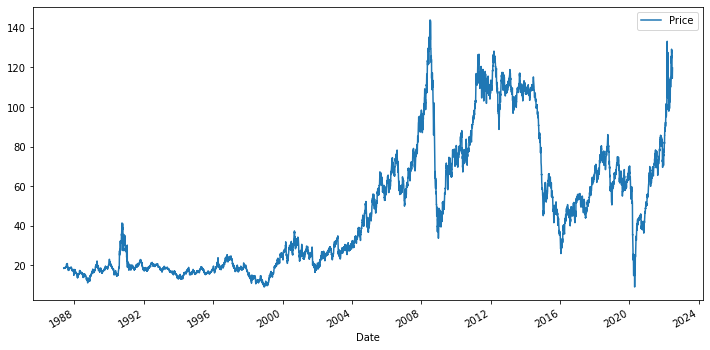

In [7]:
df.plot(x="Date",y="Price",figsize=(12,6));

In [8]:
len(df)

8911

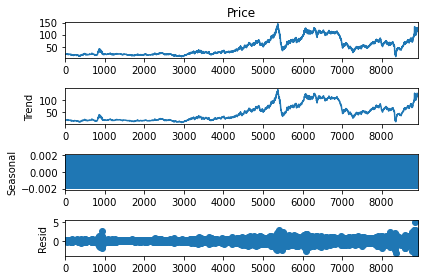

<Figure size 1080x504 with 0 Axes>

In [9]:
decompose_ts_add = seasonal_decompose(df.Price,period=2)
decompose_ts_add.plot()
plt.figure(figsize=(15,7))
plt.show();

In [10]:
year = pd.to_datetime(df.Dates).dt.year

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8911 entries, 0 to 8910
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8911 non-null   datetime64[ns]
 1   Price   8911 non-null   float64       
 2   Dates   8911 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 209.0 KB


In [12]:
train = df[year < 2021]
test = df[year>= 2021]
train.shape,test.shape

((8536, 3), (375, 3))

In [13]:
df = df.set_index(df.Date)

In [14]:
df= df['Price']

In [15]:
train = df.head(8536)
test = df.tail(375)

In [16]:
train1 = df.head(8536)
test1 = df.tail(375)

In [17]:
df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 8911 entries, 1987-05-20 to 2022-06-27
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
8911 non-null   float64
dtypes: float64(1)
memory usage: 139.2 KB


In [18]:
scaler = MinMaxScaler()

In [19]:
train_a=np.asarray(train)
train_a = train_a.reshape(-1, 1)
test_a = np.asarray(test)
test_a  = test_a.reshape(-1,1)

In [20]:
scaler.fit(train_a)
scaled_train = scaler.transform(train_a)
scaled_test = scaler.transform(test_a)

In [69]:
n_input = 100
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [70]:
x,y = generator[0]
print(f'Given the Array: \n{x.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.07067112 0.0693363  0.07007786 0.07044865 0.07067112 0.07044865
 0.07044865 0.07030033 0.07081943 0.0710419  0.07156099 0.07178346
 0.07081943 0.07156099 0.07178346 0.07178346 0.0710419  0.07178346
 0.07267334 0.07363737 0.07378569 0.07378569 0.07415647 0.07267334
 0.07156099 0.07119021 0.07400816 0.07452725 0.07400816 0.07326659
 0.07526882 0.07586207 0.07697442 0.07712273 0.07697442 0.07845755
 0.07882833 0.07956989 0.07994067 0.08290693 0.08379681 0.08550241
 0.08490916 0.08342603 0.08327772 0.0819429  0.07771598 0.0756396
 0.07919911 0.08068224 0.08231368 0.08105302 0.08787542 0.08565072
 0.07934742 0.07897664 0.07823508 0.07660363 0.07675195 0.07712273
 0.07638116 0.07526882 0.07230256 0.07156099 0.06970708 0.06822395
 0.06674082 0.06214312 0.06266222 0.06674082 0.06807564 0.06748239
 0.07067112 0.06918799 0.06896552 0.06733407 0.06696329 0.063033
 0.06362625 0.06525769 0.06822395 0.06733407 0.06711161 0.06992955
 0.06992955 0.06918799 0.06822395 0.06807564 0.

In [71]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(generator,epochs=50)

Epoch 1/50
8436/8436 [==============================] - 182s 21ms/step - loss: 7.8228e-04
Epoch 2/50
8436/8436 [==============================] - 175s 21ms/step - loss: 1.8723e-04
Epoch 3/50
8436/8436 [==============================] - 178s 21ms/step - loss: 1.3214e-04
Epoch 4/50
8436/8436 [==============================] - 177s 21ms/step - loss: 1.0869e-04
Epoch 5/50
8436/8436 [==============================] - 190s 22ms/step - loss: 1.0372e-04
Epoch 6/50
8436/8436 [==============================] - 209s 25ms/step - loss: 1.0251e-04
Epoch 7/50
8436/8436 [==============================] - 261s 31ms/step - loss: 1.0058e-04
Epoch 8/50
8436/8436 [==============================] - 271s 32ms/step - loss: 9.7300e-05
Epoch 9/50
8436/8436 [==============================] - 315s 37ms/step - loss: 9.6741e-05
Epoch 10/50
8436/8436 [==============================] - 300s 36ms/step - loss: 9.4344e-05
Epoch 11/50
8436/8436 [==============================] - 279s 33ms/step - loss: 9.6564e-05
Epoch 12

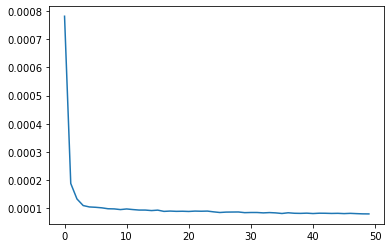

In [74]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);

In [77]:
last_train_batch = scaled_train[-100:]

In [78]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [79]:
p=model.predict(last_train_batch)

1/1 [==============================] - 0s 344ms/step


In [80]:
scaler.inverse_transform(p)

array([[51.39499]], dtype=float32)

In [81]:
scaled_test[0]

array([0.30604375])

In [82]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 29ms/step


In [83]:
test_predictions

[array([0.3136447], dtype=float32),
 array([0.31497717], dtype=float32),
 array([0.31639102], dtype=float32),
 array([0.3178637], dtype=float32),
 array([0.31937388], dtype=float32),
 array([0.32091662], dtype=float32),
 array([0.3224892], dtype=float32),
 array([0.32408956], dtype=float32),
 array([0.32571602], dtype=float32),
 array([0.32736713], dtype=float32),
 array([0.32904163], dtype=float32),
 array([0.33073846], dtype=float32),
 array([0.33245656], dtype=float32),
 array([0.3341952], dtype=float32),
 array([0.3359536], dtype=float32),
 array([0.33773112], dtype=float32),
 array([0.3395272], dtype=float32),
 array([0.34134135], dtype=float32),
 array([0.34317315], dtype=float32),
 array([0.34502217], dtype=float32),
 array([0.34688812], dtype=float32),
 array([0.34877062], dtype=float32),
 array([0.3506695], dtype=float32),
 array([0.35258445], dtype=float32),
 array([0.35451525], dtype=float32),
 array([0.3564617], dtype=float32),
 array([0.35842362], dtype=float32),
 array([0

In [84]:
true_predictions = scaler.inverse_transform(test_predictions)

In [85]:
test = df.tail(375)

In [86]:
test= pd.DataFrame(test,columns=['Price'])  

In [87]:
test['Predictions'] = true_predictions

In [88]:
test

Price  Predictions
Date                           
2021-01-04   50.37    51.394989
2021-01-05   53.16    51.574671
2021-01-06   53.80    51.765329
2021-01-07   53.70    51.963920
2021-01-08   55.51    52.167567
...            ...          ...
2022-06-21  118.51   135.837515
2022-06-22  115.54   135.837676
2022-06-23  114.50   135.837820
2022-06-24  117.36   135.837981
2022-06-27  119.69   135.838126

[375 rows x 2 columns]

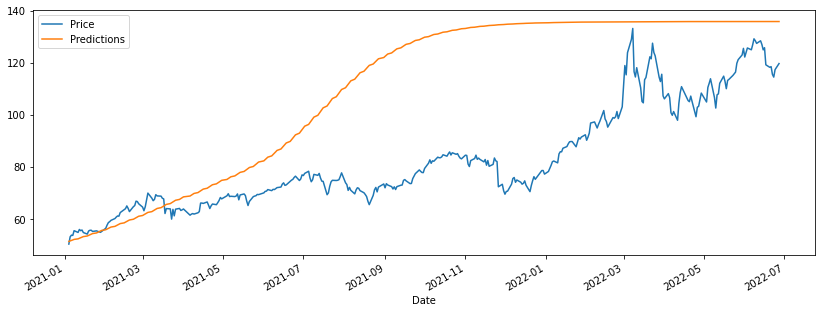

In [89]:
test.plot(figsize=(14,5));

In [90]:
n_input

100

In [91]:
train_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(train)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    train_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


In [92]:
train = pd.DataFrame(df.head(8536),columns=['Price'])

In [93]:
true_predictions_t = scaler.inverse_transform(train_predictions)

In [94]:
train['predictions']= true_predictions_t

In [95]:
train

Price  predictions
Date                          
1987-05-20  18.63    51.394989
1987-05-21  18.45    51.574671
1987-05-22  18.55    51.765329
1987-05-25  18.60    51.963920
1987-05-26  18.63    52.167567
...           ...          ...
2020-12-24  50.88   135.841534
2020-12-28  50.88   135.841534
2020-12-29  50.44   135.841534
2020-12-30  50.74   135.841534
2020-12-31  51.22   135.841534

[8536 rows x 2 columns]

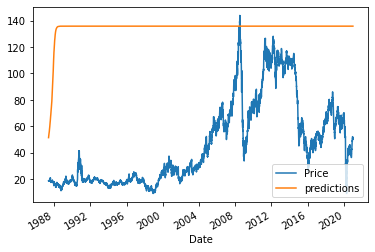

In [96]:
train.plot();